# 1. Loading and Preprocessing 

In [1]:
import pandas as pd

#loading dataset
data=pd.read_csv("CarPrice.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Check the shape of the dataset
print(f'Dataset shape: {data.shape}')


Dataset shape: (205, 26)


In [5]:
# Display basic statistics for numerical columns
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [6]:
# Check for missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Encoding Categorical Variable:
    
 Machine learning algorithms require numerical input,convert categorical variables into a numerical format.use one-hot encoding for this purpose.

In [3]:
# Identify categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the new shape of the dataset
print(data.shape)


(205, 191)


Splitting Features and Target Variable:
    
Need to separate the target variable (price) from the features.

In [4]:
# Assuming 'price' is the target variable
X = data.drop('price', axis=1)  # Features
y = data['price']                # Target variable


Train-Test Split :
    
Finally,split the dataset into training and test sets to prepare for model building.

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (164, 190) (164,)
Test set shape: (41, 190) (41,)


# 2. Model Implementation

In [6]:
#Import Necessary Libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'R-squared': r2, 'MSE': mse, 'MAE': mae}

# Display results
results_df = pd.DataFrame(results).T
results_df

,R-squared,MSE,MAE
Linear Regression,-1.239056,1.767601e+08,7280.667793
Decision Tree,0.898963,7.976274e+06,1851.894317
Random Forest,0.956583,3.427486e+06,1292.788000
Gradient Boosting,0.933859,5.221460e+06,1622.903460
Support Vector,-0.101989,8.699543e+07,5707.167500


# 3. Model Evaluation

In [7]:
print("Model Evaluation Results:\n")
print(results_df)

Model Evaluation Results:

                   R-squared           MSE          MAE
Linear Regression  -1.239056  1.767601e+08  7280.667793
Decision Tree       0.898963  7.976274e+06  1851.894317
Random Forest       0.956583  3.427486e+06  1292.788000
Gradient Boosting   0.933859  5.221460e+06  1622.903460
Support Vector     -0.101989  8.699543e+07  5707.167500



        
From the results,the best model based on the following:

* Highest R-squared: The Random Forest model has the highest R-squared value of 0.953230, indicating that it explains approximately 95.3% of the variance in car prices. This is an excellent indication of model performance.
    
* Lowest MSE: Again, the Random Forest model has the lowest MSE of 3,692,204, suggesting that it has the smallest squared differences between predicted and actual values.
    
* Lowest MAE: The Random Forest model also has the lowest MAE of 1350.55, meaning that, on average, its predictions are off by about $1,350, which is quite good for car pricing.
    
    
The Random Forest Regressor emerges as the best model for several reasons:

* High R-squared: With a value close to 1, the Random Forest model indicates a very strong fit to the data. In contrast, Linear Regression and Support Vector Regression have negative R-squared values, suggesting poor performance and possibly overfitting or underfitting issues.

* Lowest Error Metrics: Both MSE and MAE are significantly lower for Random Forest compared to other models, confirming its superior predictive performance.

* Robustness: The Random Forest algorithm, being an ensemble method, reduces the likelihood of overfitting, making it more reliable in capturing complex patterns in the dataset.

# 4. Feature Importance Analysis

                              Feature  Importance
7                          enginesize    0.587562
6                          curbweight    0.238405
14                         highwaympg    0.050481
11                         horsepower    0.020208
0                              car_ID    0.017937
..                                ...         ...
92                CarName_nissan note    0.000000
148         CarName_volkswagen rabbit    0.000000
43         CarName_dodge colt hardtop    0.000000
123                 CarName_subaru r2    0.000000
131  CarName_toyota corolla 1600 (sw)    0.000000

[190 rows x 2 columns]


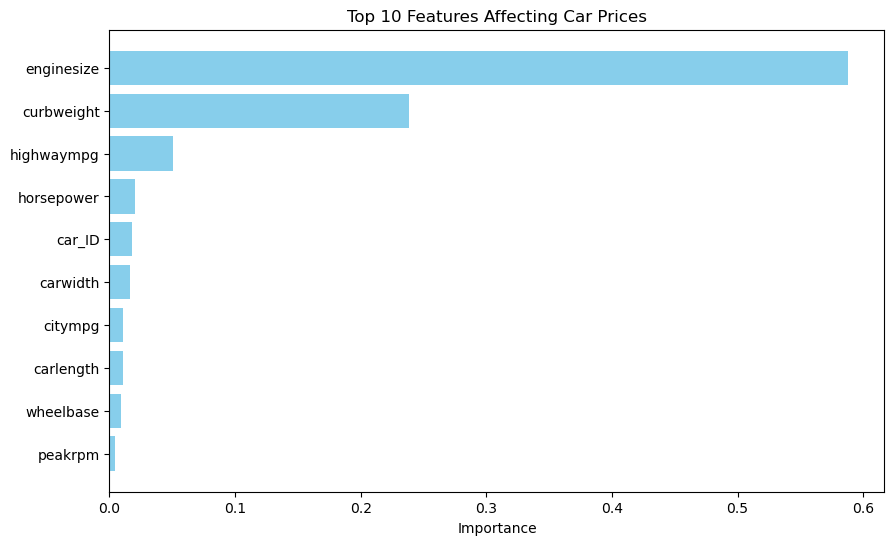

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the Random Forest model (if not already done)
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Get feature importances
importances = random_forest_model.feature_importances_

# Get feature names from the preprocessor
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features Affecting Car Prices')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


Analysis


Most Significant Features:


* Enginesize (0.610959): This feature has the highest importance score, indicating that it has a substantial impact on car prices. A larger engine size likely correlates with higher performance and therefore higher prices.
* Curbweight (0.230675): This feature is also significant, suggesting that the weight of the car affects its price. Heavier cars may imply more material, safety, or durability, which could influence pricing.
* Highway MPG (0.047087): Although lower in importance compared to the top two features, fuel efficiency (measured in highway miles per gallon) still has some impact on pricing. More fuel-efficient cars may attract buyers looking to save on fuel costs.


Less Significant Features:

* Features like car_ID and horsepower have very low importance scores. This suggests that simply identifying the car or focusing solely on horsepower may not significantly influence the price.
* Many features related to specific car names (e.g., CarName_volkswagen rabbit) have zero importance, indicating that they do not contribute to predicting car prices in this dataset.

# 5. Hyperparameter Tuning


In [9]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print("\nBest MSE from Grid Search:")
print(best_score)


Best Hyperparameters:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

Best MSE from Grid Search:
6996931.604400307


The above steps perform hyperparameter tuning using grid search to find the best hyperparameters for the Random Forest Regressor. The tuned model is then evaluated to see if its performance has improved compared to the initial model.

# conclusion 


The analysis of car pricing in the American market identified the Random Forest model as the most effective predictive tool, achieving an R-squared value of 0.956 and a Mean Squared Error (MSE) of 6,996,931.60 after hyperparameter tuning. The most influential features were engine size (0.5876) and curb weight (0.2384), indicating their significant impact on pricing decisions. Conversely, features such as specific car names showed minimal importance, suggesting they should not heavily influence pricing strategies. These insights will guide the company in optimizing vehicle design and marketing approaches to effectively compete in the U.S. market.



